In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
def calc_mse(y, y_pred):
    """средняя квадратическая ошибка"""
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      bias=0, # intersept=0   
                                      coef=True, 
                                      random_state=42)

In [4]:
coef

array([40.71064891,  6.60098441])

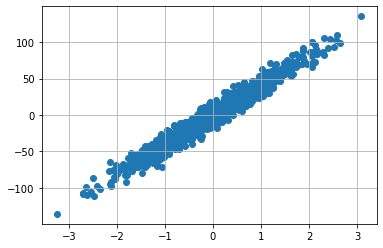

In [5]:
plt.scatter(X_[:, 0], y_);
plt.grid()

In [6]:
def eval_GD(X, y, iterations, eta=1e-4):
    """метод градиентного спуска"""
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
        errors.append(err)
    return w, errors

In [7]:
def eval_SGD(X, y, iterations, eta=1e-4):
    """стохастический градиентный спуск"""
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    errors = []
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
        errors.append(err)
    return w, errors

In [8]:
%%time

w_gd, err_gd = eval_GD(X_, y_, iterations=1000, eta=1e-3)

100: weights=[7.32874893 1.16801485], MSE=1103.189
200: weights=[13.00512448  2.22541594], MSE=767.897
300: weights=[17.72134432  3.08125022], MSE=536.838
400: weights=[21.63983474  3.77385273], MSE=377.594
500: weights=[24.89554186  4.33428243], MSE=267.836
600: weights=[27.60058142  4.78770076], MSE=192.180
700: weights=[29.84810175  5.15448943], MSE=140.027
800: weights=[31.71549299  5.45115674], MSE=104.072
900: weights=[33.26705326  5.69107223], MSE=79.283
1000: weights=[34.55620366  5.88506234], MSE=62.191
CPU times: user 49.9 ms, sys: 0 ns, total: 49.9 ms
Wall time: 47.4 ms


In [9]:
%%time

w_sgd, err_sgd = eval_SGD(X_, y_, iterations=1000, eta=1e-3)

100: weights=[5.65425267 1.36197629], MSE=1205.412
200: weights=[12.7105185   3.55875223], MSE=777.747
300: weights=[17.03707268  4.31522315], MSE=557.260
400: weights=[22.08826107  5.2663299 ], MSE=354.413
500: weights=[25.87193649  5.6555326 ], MSE=234.136
600: weights=[28.44101069  5.83399449], MSE=168.474
700: weights=[30.47041536  5.98949961], MSE=126.357
800: weights=[32.21255052  6.06519403], MSE=94.853
900: weights=[33.73922351  6.1450052 ], MSE=72.050
1000: weights=[34.6055792   6.40988743], MSE=60.892
CPU times: user 86.8 ms, sys: 158 µs, total: 87 ms
Wall time: 82.9 ms


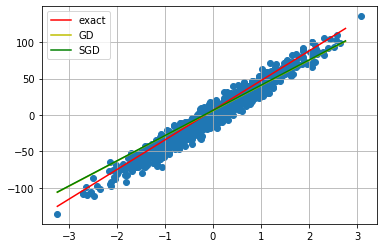

In [10]:
x = np.arange(np.min(X_[:, 0]), np.max(X_[:, 0]))
y0 = coef[1] + x*coef[0]
y1 = w_gd[1] + x*w_gd[0]
y2 = w_sgd[1] + x*w_sgd[0]

plt.scatter(X_[:, 0], y_)
plt.plot(x, y0, c='r', label="exact")
plt.plot(x, y1, c='y', label="GD")
plt.plot(x, y2, c='g', label="SGD")
plt.grid()
plt.legend()

Text(0, 0.5, 'Ошибка (MSE)')

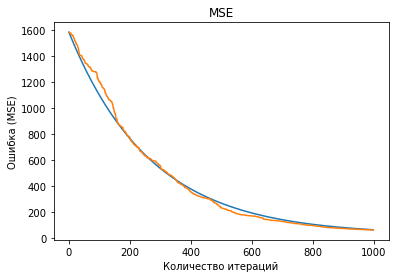

In [11]:
plt.plot(range(len(err_gd)), err_gd)
plt.plot(range(len(err_sgd)), err_sgd)
plt.title("MSE")
plt.xlabel("Количество итераций")
plt.ylabel("Ошибка (MSE)")

2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).